## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


Group P: Bacheler Burt, Lily Rademacher, Mia Cachion

We acknowledge that we have used AI to the extent permitted by the UVA AI acceptable use policy. This has been mutually agreed upon. We acknowlegde that we are aware of the possibility of AI producing errors and offensive content and certify that we have taken the necessary measures to ensure that the work produced is both accurate and ethical to the best of our ability.

In [84]:
#1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

url = "https://raw.githubusercontent.com/amn8ge/lab_eda/main/gss_media_pol.csv"
media = pd.read_csv(url)
media.head()


,year,id_,age,educ,sex,race,income,region,partyid,polviews,news,tvhours,newsfrom,realinc,WHOVOTE24
0,1972,1,23,4 years of college,FEMALE,White,.i: Inapplicable,East North Central,"Independent, close to democrat",.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,18951.0,.y: Not available in this year
1,1972,2,70,10th grade,MALE,White,.i: Inapplicable,East North Central,Not very strong democrat,.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,24366.0,.y: Not available in this year
2,1972,3,48,12th grade,FEMALE,White,.i: Inapplicable,East North Central,"Independent (neither, no response)",.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,24366.0,.y: Not available in this year
3,1972,4,27,5 years of college,FEMALE,White,.i: Inapplicable,East North Central,Not very strong democrat,.i: Inapplicable,Once a week,.i: Inapplicable,.i: Inapplicable,30458.0,.y: Not available in this year
4,1972,5,61,12th grade,FEMALE,White,.i: Inapplicable,East North Central,Strong democrat,.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,50763.0,.y: Not available in this year


# 2


Our lab is centered around media consumption and political views. There is significant interplay between the two spheres, stemming from the fact that different media forms and companies have specific slants with respect to political ideology. Media consumption has the power to influence and intensify political views. This dynamic is exemplified by political talk show hosts like Bill Maher and Tucker Carlson, who aim to garner viewership and convince viewers of their political position. Increasingly, politics are grossly intertwined with media presence—political media personalities operate as pseuod-influencers and pseudo-politicians. We hope to analyze political views as a function of media engagement across a few different sectors of the media, as well as incorporate demographic controls such as sex, age, level of education, and region.

The full list of our variable set is as follows:

TVHOURS: Hours per day spent watching television
NEWS: Frequency of reading the newspaper
NEWSFROM: Main source of information about events in the news
PARTYID: Political party identification
POLVIEWS: Political ideology (liberal/conservative scale)
WHOVOTE24: Voting intention in 2024 election (Pre-July 2024)
AGE: Age of respondent
SEX: Sex of respondent
EDUC: Highest year of school completed
REGION: Region of interview
RACE: Race of respondent (White/Black/Other; available for all years, simple to use)
INCOME: Family income (categorical)
REALINC: Family income (continuous in dollars)
In selecting our data, we aimed to capture the multifaceted relationship between media consumption and political attitudes in the United States. The contemporary media landscape is marked by a proliferation of both traditional and digital platforms, each with distinct influences on how individuals encounter and process political information. It's our anecdotal understanding that people often gravitate toward media sources that reinforce their existing beliefs, which can contribute to political polarization. People seek out echo chambers that validate their pre-existing opinions. Digital media, especially social platforms, has the power to expose viewers to a wider array of viewpoints, but it also has the power to isolate people from opposing perspectives by only pushing content to them that they already support.

Our variable set was chosen to reflect these dynamics. By including measures of television, newspaper, and internet use, we can compare the effects of different media types on political attitudes and behaviors. Political variables such as party identification, ideology, and voting behavior allow us to examine not just opinions, but also engagement. Demographic controls (age, sex, education, region, race, and income) are essential for understanding how media and politics intersect across diverse social groups.

We hope to explore questions like: Do certain media habits predict stronger partisan behavior? Are there demographic divides in media use that map onto political ones? How does trust in government relate to both media consumption and socioeconomic status?

The extracted data is stored under "gss_media_pol.csv" in this Github repo.

In [82]:
# 3 - Cleaning

media = pd.read_csv('gss_media_pol.csv')

import numpy as np

# Region -
# No major blemishes, capital letters consistent.
print(media['region'].nunique())
print(media['region'].unique())


# Race -
# Replaced "Inapplicable" with na's to keep row but aggregate unhelpful obersvations.
media["race_clean"] = media["race"].replace(".i:  Inapplicable", np.nan)
print(media['race'].nunique())
print(media['race'].unique())


# Age -
# cleaned to remove spaces, commas, and coerced as integers. Added new column
# called 'age_clean'
media['age_clean'] = (
    media['age']
    .astype(str)                        # Convert to string
    .str.replace(' ', '', regex=True)  # Remove spaces
    .str.replace(',', '', regex=True)  # Remove commas
)
media['age_clean'] = pd.to_numeric(media['age_clean'], errors='coerce')  # Convert to numeric, invalid to NaN
# Here I divided the clean age data into groups so that they could be more easily
# examined in a graph.
bins = [18, 30, 45, 60, 75, float('inf')]
labels = ['18-30', '31-45', '46-60', '61-75', '75+']
media['age_group'] = pd.cut(media['age_clean'], bins=bins, labels=labels, right=True, include_lowest=True)


# News -
# Replace specified values with NaN in a new column 'news_clean'
media['news_clean'] = media['news'].replace(
    ['.n:  No answer', '.i:  Inapplicable', '.s:  Skipped on Web'],
    np.nan
)

media.head(10)


9
['East North Central' 'West South Central' 'East South Central'
 'West North Central' 'New England' 'Pacific' 'South Atlantic'
 'Middle Atlantic' 'Mountain']
4
['White' 'Black' 'Other' '.i:  Inapplicable']


,year,id_,age,educ,sex,race,income,region,partyid,polviews,news,tvhours,newsfrom,realinc,WHOVOTE24,race_clean,age_clean,age_group,news_clean
0,1972,1,23,4 years of college,FEMALE,White,.i: Inapplicable,East North Central,"Independent, close to democrat",.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,18951.0,.y: Not available in this year,White,23.0,18-30,Every day
1,1972,2,70,10th grade,MALE,White,.i: Inapplicable,East North Central,Not very strong democrat,.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,24366.0,.y: Not available in this year,White,70.0,61-75,Every day
2,1972,3,48,12th grade,FEMALE,White,.i: Inapplicable,East North Central,"Independent (neither, no response)",.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,24366.0,.y: Not available in this year,White,48.0,46-60,Every day
3,1972,4,27,5 years of college,FEMALE,White,.i: Inapplicable,East North Central,Not very strong democrat,.i: Inapplicable,Once a week,.i: Inapplicable,.i: Inapplicable,30458.0,.y: Not available in this year,White,27.0,18-30,Once a week
4,1972,5,61,12th grade,FEMALE,White,.i: Inapplicable,East North Central,Strong democrat,.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,50763.0,.y: Not available in this year,White,61.0,61-75,Every day
5,1972,6,26,2 years of college,MALE,White,.i: Inapplicable,East North Central,"Independent, close to democrat",.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,43994.0,.y: Not available in this year,White,26.0,18-30,Every day
6,1972,7,28,1 year of college,MALE,White,.i: Inapplicable,East North Central,"Independent, close to democrat",.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,37226.0,.y: Not available in this year,White,28.0,18-30,Every day
7,1972,8,27,4 years of college,MALE,White,.i: Inapplicable,East North Central,"Independent, close to democrat",.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,13537.0,.y: Not available in this year,White,27.0,18-30,Every day
8,1972,9,21,12th grade,FEMALE,Black,.i: Inapplicable,West South Central,Strong democrat,.i: Inapplicable,Less than once a week,.i: Inapplicable,.i: Inapplicable,2707.0,.y: Not available in this year,Black,21.0,18-30,Less than once a week
9,1972,10,30,12th grade,FEMALE,Black,.i: Inapplicable,West South Central,Strong democrat,.i: Inapplicable,Every day,.i: Inapplicable,.i: Inapplicable,18951.0,.y: Not available in this year,Black,30.0,18-30,Every day


AttributeError: module 'matplotlib' has no attribute 'xlabel'

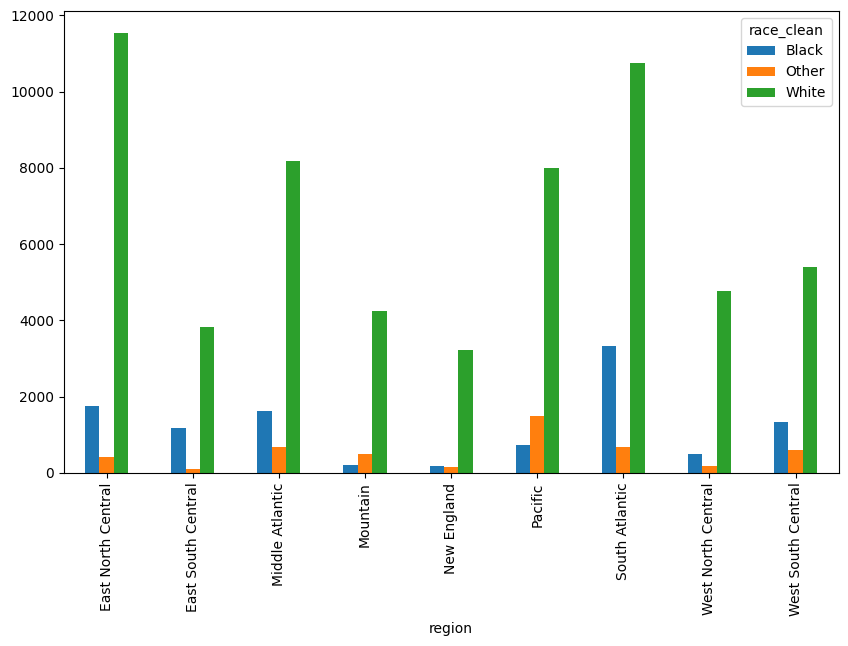

In [83]:
# 4 - Numeric Summaries and Visualizations


# Race and Region
cross = pd.crosstab(media['region'], media['race_clean'])
cross.plot(kind='bar', figsize=(10,6))
plt.xlabel('Region')
plt.ylabel('Race (Count)')
plt.title('Region vs Race (Grouped Bar)')
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# age and news
cross = pd.crosstab(media['age_group'], media['news_clean'])
cross.plot(kind='bar', figsize=(10,6))
plt.xlabel('Age Group')
plt.ylabel('News')
plt.title('Age Group vs. News (Grouped Bar)')
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


# Crosstab counts for age_group and news_clean
age_news_crosstab = pd.crosstab(media['age_group'], media['news_clean'])
print("Crosstab counts for Age Group and News:")
print(age_news_crosstab)

# Crosstab counts for race_clean and region
race_region_crosstab = pd.crosstab(media['race_clean'], media['region'])
print("\nCrosstab counts for Race and Region:")
print(race_region_crosstab)


In [ ]:
#5